In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump,load



In [3]:
url ='https://raw.githubusercontent.com/digipodium/Datasets/main/50_Startups.csv'
df= pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
state_enc= OneHotEncoder(drop='first')
dummy_state= state_enc.fit_transform(df[['State']]).toarray()
# df.drop(columns=['State'], inplace=True)
df= pd.concat([pd.DataFrame(dummy_state), df], axis = 1)
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.columns=df.columns.astype(str)

In [8]:
X= df.drop(columns=['Profit', 'State'])
y=df['Profit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model= LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X)

c:\Users\acer\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [11]:
r2_score(y_test, model.predict(X_test))

0.8987266414319838

In [12]:
mean_squared_error(y,y_pred)

1.5026321681628285e+19

In [13]:
model.score(X_test,y_test)*100

89.87266414319838

In [14]:
df['pred']= model.predict(scaler.transform(X))

In [15]:
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit,pred
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83,191913.727404
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06,187861.478390
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39,183805.404267
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99,173623.190356
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94,174098.252026


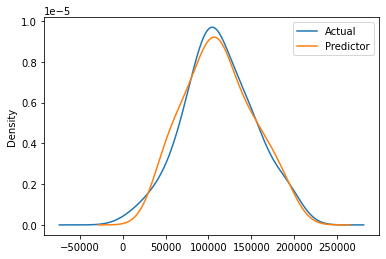

In [16]:
df['Profit'].plot(kind='kde', label= "Actual")
df['pred'].plot(kind='kde', label="Predictor")
plt.legend()
plt.show()


In [17]:
dump(model,'../../Models/Startup_profit.pk')

['../../Models/Startup_profit.pk']

In [18]:
df

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit,pred
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83,191913.727404
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06,187861.478390
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39,183805.404267
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99,173623.190356
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94,174098.252026
5,0.0,1.0,131876.90,99814.71,362861.36,New York,156991.12,164246.366805
6,0.0,0.0,134615.46,147198.87,127716.82,California,156122.51,156165.844899
7,1.0,0.0,130298.13,145530.06,323876.68,Florida,155752.60,159597.700472
8,0.0,1.0,120542.52,148718.95,311613.29,New York,152211.77,150220.996590
9,0.0,0.0,123334.88,108679.17,304981.62,California,149759.96,155019.878223


In [19]:
model_dict={
    'ste': state_enc,
    'scaler': scaler,
    'model': model,
    'description': 'Startup profit prediction model form multiple_linear_regression'
    
}

In [20]:
rnd= float(input("Enter amount spend on Research and Development:"))
mkt= float(input("Enter amount spend on Marketing:"))
adm= float(input("Enter amount spend on Administration:"))
state= (input("Enter State: [NewYork, California, Florida]"))

56482.30422910232


c:\Users\acer\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\Users\acer\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

